In [7]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to C:\Users\TEMP.LAPTOP-
[nltk_data]     C50DVQCH.001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\TEMP.LAPTOP-
[nltk_data]     C50DVQCH.001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\TEMP.LAPTOP-
[nltk_data]     C50DVQCH.001\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
from datetime import datetime

pd.set_option("display.max_columns", None)
pd.reset_option("display.max_rows")
# Load the data
df_sentiment = pd.read_csv('japan_sentiment.csv' , encoding="utf-8")
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_sentiment['date'] = df_sentiment['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_forex = pd.read_csv(f'daily_forex_rates.csv')

# FOR JAPAN
currency = ['JPY']
df_JPY = df_forex[df_forex['currency'].isin(currency)]
df_JPY['date'] = pd.to_datetime(df_JPY['date'])
df_JPY['date'] = df_JPY['date'].apply(lambda x: x.strftime('%Y-%m-%d'))


# Merging th df
merged_df = pd.merge(df_sentiment, df_JPY, on='date', how='outer')  # 'how' parameter determines the type of join
merged_df

C:\Users\TEMP.LAPTOP-C50DVQCH.001\AppData\Local\Temp\ipykernel_3096\4107174799.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JPY['date'] = pd.to_datetime(df_JPY['date'])
C:\Users\TEMP.LAPTOP-C50DVQCH.001\AppData\Local\Temp\ipykernel_3096\4107174799.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JPY['date'] = df_JPY['date'].apply(lambda x: x.strftime('%Y-%m-%d'))


,URL link,Website,Title,date,Article,Sentiments_values,Sentiments,currency,base_currency,currency_name,exchange_rate
0,https://news.google.com/rss/articles/CBMicGh0d...,FX News Group,Institutional FX liquidity platform Spark Syst...,2020-05-15,Singapore based institutional FX liquidity and...,0.9747,Positive,JPY,EUR,Japanese Yen,115.942
1,https://news.google.com/rss/articles/CBMicGh0d...,FX News Group,Exclusive: Windsor Brokers adds Alokesh Bhatta...,2020-06-17,FNG Exclusive��� FNG has learned that Cyprus b...,0.4215,Neutral,JPY,EUR,Japanese Yen,120.371
2,https://news.google.com/rss/articles/CBMiZGh0d...,FX News Group,Offshore FX broker Doo Prime gets Mauritius li...,2020-06-10,"Doo Prime, the China-focused retail FX brokera...",0.7506,Positive,JPY,EUR,Japanese Yen,121.654
3,https://news.google.com/rss/articles/CBMiZ2h0d...,FX News Group,"Andrey Dashin folds Alpari, FXTM into new Exin...",2020-06-23,Serial retail FX entrepreneur Andrey Dashin ha...,0.9716,Positive,JPY,EUR,Japanese Yen,120.387
4,https://news.google.com/rss/articles/CBMiW2h0d...,FX News Group,FXCM wins UK suit over Swiss Franc stop loss,2020-06-23,"More than five years after the fact, a number ...",0.9896,Positive,JPY,EUR,Japanese Yen,120.387
...,...,...,...,...,...,...,...,...,...,...,...
5247,NaN,NaN,NaN,2004-09-06,NaN,NaN,NaN,JPY,EUR,Japanese Yen,132.830
5248,NaN,NaN,NaN,2004-09-03,NaN,NaN,NaN,JPY,EUR,Japanese Yen,133.360
5249,NaN,NaN,NaN,2004-09-02,NaN,NaN,NaN,JPY,EUR,Japanese Yen,133.220
5250,NaN,NaN,NaN,2004-09-01,NaN,NaN,NaN,JPY,EUR,Japanese Yen,133.350


In [10]:
# sentiment_values = merged_df['Sentiments_values']

In [ ]:
# # Assuming df_JPY is your DataFrame containing 'date' and 'exchange_rate' columns
# # Sort the DataFrame by 'date'
# df_JPY = df_JPY[['date', 'exchange_rate']]
# df_JPY['date'] = pd.to_datetime(df_JPY['date'])  # Convert 'date' to datetime format
# df_JPY = df_JPY.sort_values('date')

# # Define sample sentiment data array (replace this with your actual sentiment data)
# dates = df_JPY['date']  # Assuming dates align between sentiment data and exchange rates

# # Filter data from 2019 to 2024
# start_date = '2019-01-01'
# end_date = '2024-12-31'
# df_filtered = df_JPY[(df_JPY['date'] >= start_date) & (df_JPY['date'] <= end_date)]

# # Merge sentiment data with exchange rate data
# df_filtered['sentiment_values'] = sentiment_values
# df_filtered

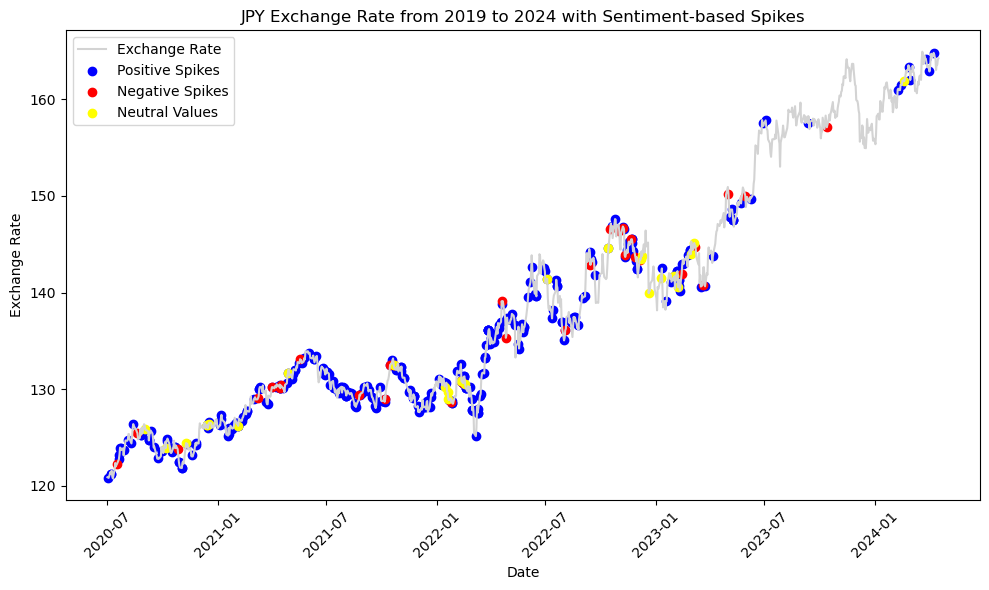

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame containing 'date', 'exchange_rate', and 'Sentiments_values' columns
# Sort the DataFrame by 'date'
merged_df = merged_df[['date', 'exchange_rate', 'Sentiments_values']]
merged_df['date'] = pd.to_datetime(merged_df['date'])  # Convert 'date' to datetime format
merged_df = merged_df.sort_values('date')

# Remove null values from the 'exchange_rate' column
merged_df = merged_df.dropna(subset=['exchange_rate'])

# Filter data from 2019 to 2024
start_date = '2020-07-01'
end_date = '2024-12-31'
df_filtered = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

# Define thresholds for positivity, negativity, and neutrality
# Adjust these thresholds based on your sentiment values
negativity_threshold = -0.5
positivity_threshold = 0.5

# Identify spikes based on sentiment scores
positive_spikes = df_filtered[df_filtered['Sentiments_values'] >= positivity_threshold]
negative_spikes = df_filtered[df_filtered['Sentiments_values'] < negativity_threshold]
neutral_values = df_filtered[(df_filtered['Sentiments_values'] >= negativity_threshold) & (df_filtered['Sentiments_values'] < positivity_threshold)]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the line chart
plt.plot(df_filtered['date'], df_filtered['exchange_rate'], label='Exchange Rate', color='#d3d3d3')

# Highlight positive spikes in green and negative spikes in red
plt.scatter(positive_spikes['date'], positive_spikes['exchange_rate'], color='blue', label='Positive Spikes', marker='o')
plt.scatter(negative_spikes['date'], negative_spikes['exchange_rate'], color='red', label='Negative Spikes', marker='o')

# If needed, you can also plot neutral values in a different color
plt.scatter(neutral_values['date'], neutral_values['exchange_rate'], color='yellow', label='Neutral Values', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('JPY Exchange Rate from 2019 to 2024 with Sentiment-based Spikes')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame containing 'date' and 'exchange_rate' columns
# Sort the DataFrame by 'date'
merged_df = merged_df[['date', 'exchange_rate']]
merged_df['date'] = pd.to_datetime(merged_df['date'])  # Convert 'date' to datetime format
merged_df = merged_df.sort_values('date')

# Filter data from 2019 to 2024
start_date = '2019-01-01'
end_date = '2024-12-31'
df_filtered = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

# Calculate mean and standard deviation for the filtered data
mean_rate = df_filtered['exchange_rate'].mean()
std_dev = df_filtered['exchange_rate'].std()

# Calculate upper and lower bounds for spikes
upper_bound = mean_rate + 1.7* std_dev
lower_bound = mean_rate - 1.2 * std_dev

# Identify spikes outside the 95% confidence interval
positive_spikes = df_filtered[df_filtered['exchange_rate'] > upper_bound]
negative_spikes = df_filtered[df_filtered['exchange_rate'] < lower_bound]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the line chart
plt.plot(df_filtered['date'], df_filtered['exchange_rate'], label='Exchange Rate', color='blue')

# Highlight positive spikes in red, negative spikes in green, and neutral values in yellow
plt.scatter(positive_spikes['date'], positive_spikes['exchange_rate'], color='green', label='Positive Spikes')
plt.scatter(negative_spikes['date'], negative_spikes['exchange_rate'], color='red', label='Negative Spikes')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('JPY Exchange Rate from 2019 to 2024 with Spikes Using Confidence Intervals')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


TypeError: unhashable type: 'Series'

In [12]:
merged_df

,date,exchange_rate
5251,2004-08-31,132.850000
5250,2004-09-01,133.350000
5249,2004-09-02,133.220000
5248,2004-09-03,133.360000
5247,2004-09-06,132.830000
...,...,...
389,2024-04-12,163.014423
388,2024-04-13,163.554363
387,2024-04-14,163.554332
386,2024-04-15,164.082383
